In [4]:
# Spatial Analysis -- (attention to pie charts)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# load the data from csv -- useful?
data = pd.read_csv('trip_program.csv')
data.columns

Index(['source', 'end_ts', 'end_fmt_time', 'end_loc', 'raw_trip', 'start_ts',
       'start_fmt_time', 'start_loc', 'duration', 'distance', 'start_place',
       'end_place', 'cleaned_trip', 'inferred_labels', 'inferred_trip',
       'expectation', 'confidence_threshold', 'expected_trip', 'user_input',
       'start_local_dt_year', 'start_local_dt_month', 'start_local_dt_day',
       'start_local_dt_hour', 'start_local_dt_minute', 'start_local_dt_second',
       'start_local_dt_weekday', 'start_local_dt_timezone',
       'end_local_dt_year', 'end_local_dt_month', 'end_local_dt_day',
       'end_local_dt_hour', 'end_local_dt_minute', 'end_local_dt_second',
       'end_local_dt_weekday', 'end_local_dt_timezone', '_id', 'user_id',
       'metadata_write_ts', 'mode_confirm', 'purpose_confirm', 'replaced_mode',
       'distance_miles', 'Mode_confirm', 'Replaced_mode', 'Trip_purpose',
       'user_id_str', 'program', 'opcode', 'distance_km'],
      dtype='object')

In [31]:
data[['start_loc', 'end_loc']].head() #these don't look like coords?

,start_loc,end_loc
0,"{'type': 'Point', 'coordinates': [-71.11831245...","{'type': 'Point', 'coordinates': [-71.08788681..."
1,"{'type': 'Point', 'coordinates': [-111.9167906...","{'type': 'Point', 'coordinates': [-111.9450490..."
2,"{'type': 'Point', 'coordinates': [-111.9437005...","{'type': 'Point', 'coordinates': [-111.9440840..."
3,"{'type': 'Point', 'coordinates': [-111.9440840...","{'type': 'Point', 'coordinates': [-111.9448744..."
4,"{'type': 'Point', 'coordinates': [-111.9448744...","{'type': 'Point', 'coordinates': [-110.8175686..."


## we could hard-code the change, for now, since we don't need to change the map

In [15]:
# establish the datasets -- hardcoded from the pie charts in the paper REPLACE ME
programs = ('sc', 'cc', 'fc', '4c', 'pc', 'vail')

eBikeDominance = {'Program': ['Smart Commute\n(Denver North)', 'Comunity Cycles\n(Boulder)', 
                              'Fort Collins', 'Four Corners\n(Durango)', 
                              'Pueblo', 'Vail'], 
                  'True': [17.9, 64.7, 47.3, 78.9, 35.5, 23.5 ],
                 'False': [82.1, 35.3, 52.7, 21.1, 64.5, 76.5]}

eBikeGood = {'Program': ['Smart Commute\n(Denver North)', 'Comunity Cycles\n(Boulder)', 
                          'Fort Collins', 'Four Corners\n(Durango)', 
                          'Pueblo', 'Vail'], 
                'True': [19.8, 74.5, 49.1, 84.2, 47.4, 47.1],
               'False': [80.2, 25.5, 50.9, 15.8, 52.6, 52.9]}

# gather datasets into dataframes
eBikeDominance = pd.DataFrame(eBikeDominance)
eBikeGood = pd.DataFrame(eBikeGood)

eBikeDominance = eBikeDominance.set_index('Program')
eBikeGood = eBikeGood.set_index('Program')

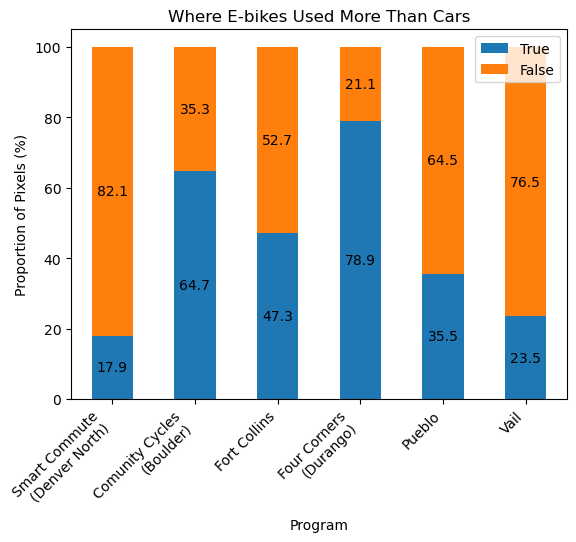

In [21]:
ax = eBikeDominance.plot.bar(stacked=True,
                            title="Where E-bikes Used More Than Cars", 
                            ylabel="Proportion of Pixels (%)",
                            xlabel = "Program",)
for c in ax.containers:
    labels = [f'{round(v.get_height(),1)}' for v in c]
    ax.bar_label(c, labels=labels, label_type='center')
    
ax.set_xticklabels(eBikeDominance.index, rotation=45, ha='right')

plt.savefig("CanBikeCO_report_ebike_pixels_moreThanCars.jpeg", bbox_inches='tight')

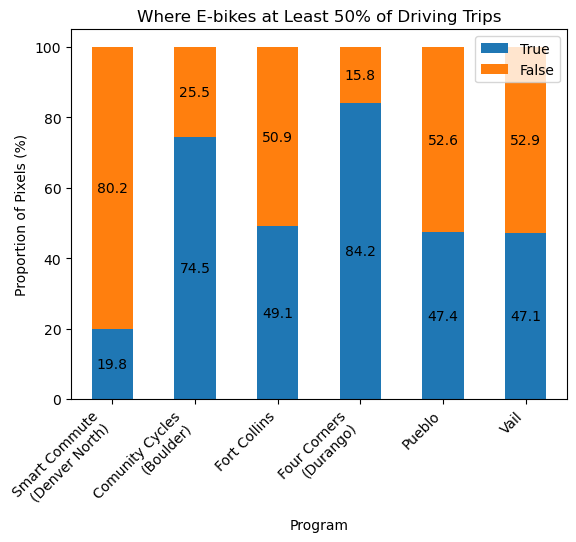

In [22]:
ax = eBikeGood.plot.bar(stacked=True,
                        title="Where E-bikes at Least 50% of Driving Trips", 
                        ylabel="Proportion of Pixels (%)",
                        xlabel = "Program",)

for c in ax.containers:
    labels = [f'{round(v.get_height(),1)}' for v in c]
    ax.bar_label(c, labels=labels, label_type='center')

ax.set_xticklabels(eBikeGood.index, rotation=45, ha='right')

plt.savefig("CanBikeCO_report_ebike_pixels_atLeast50OfCars.jpeg", bbox_inches='tight')